In [1]:
from sklearn.datasets import load_boston,load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import itertools

In [2]:
from pandasxtend.eda.stats import KL_Divergence,Summary
from pandasxtend.eda.visualization import AllPlot

from pandasxtend.catdap import CATDAP01,CATDAP02

In [3]:
#load_breast_cancer()

In [4]:
X = load_boston()["data"]
y = load_boston()["target"]
cols = load_boston()["feature_names"]

X_df = pd.DataFrame(X)
X_df.columns = cols

In [5]:
np.random.seed(1111)
X_df["rand"] = np.random.choice([1,2,3,4,5],X_df.shape[0])

In [6]:
dic_date = {1:"19900101",2:"20000202",3:"20100303",4:"20200404",5:np.nan}
dic_str = {1:"A",2:"BB",3:"CCC",4:"DDDD",5:"EEEEE"}

X_df["sample_datetime"] = pd.to_datetime(X_df["rand"].map(dic_date))
X_df["sample_str"] = X_df["rand"].map(dic_str)

In [7]:
X_df["flg_over_age"] = (X_df["AGE"] >= X_df["AGE"].mean()).astype(int)

In [8]:
bun_df = X_df.copy()
bun_df["target"] = y

In [9]:
mean_target = bun_df["target"].mean()
bun_df["flg_target"] = (bun_df["target"] >= mean_target).astype(int)
#bun_df["flg_target"] = (bun_df["target"] < mean_target)

In [10]:
#y

In [11]:
y_binary = (y > y.mean()).astype(int)

In [12]:
#X_df

In [13]:
cat = CATDAP01()
cat.fit(X_df,y_binary)

AIC calculation is end


In [14]:
cat.AIC_summary

,feature_name,AIC
0,LSTAT,-293.24139
1,RM,-194.99423
2,INDUS,-148.46079
3,PTRATIO,-134.29559
4,NOX,-115.21668
5,AGE,-92.56754
6,TAX,-84.91045
7,CRIM,-80.39282
8,RAD,-76.76335
9,flg_over_age,-73.07671


In [15]:
cat.to_csv()

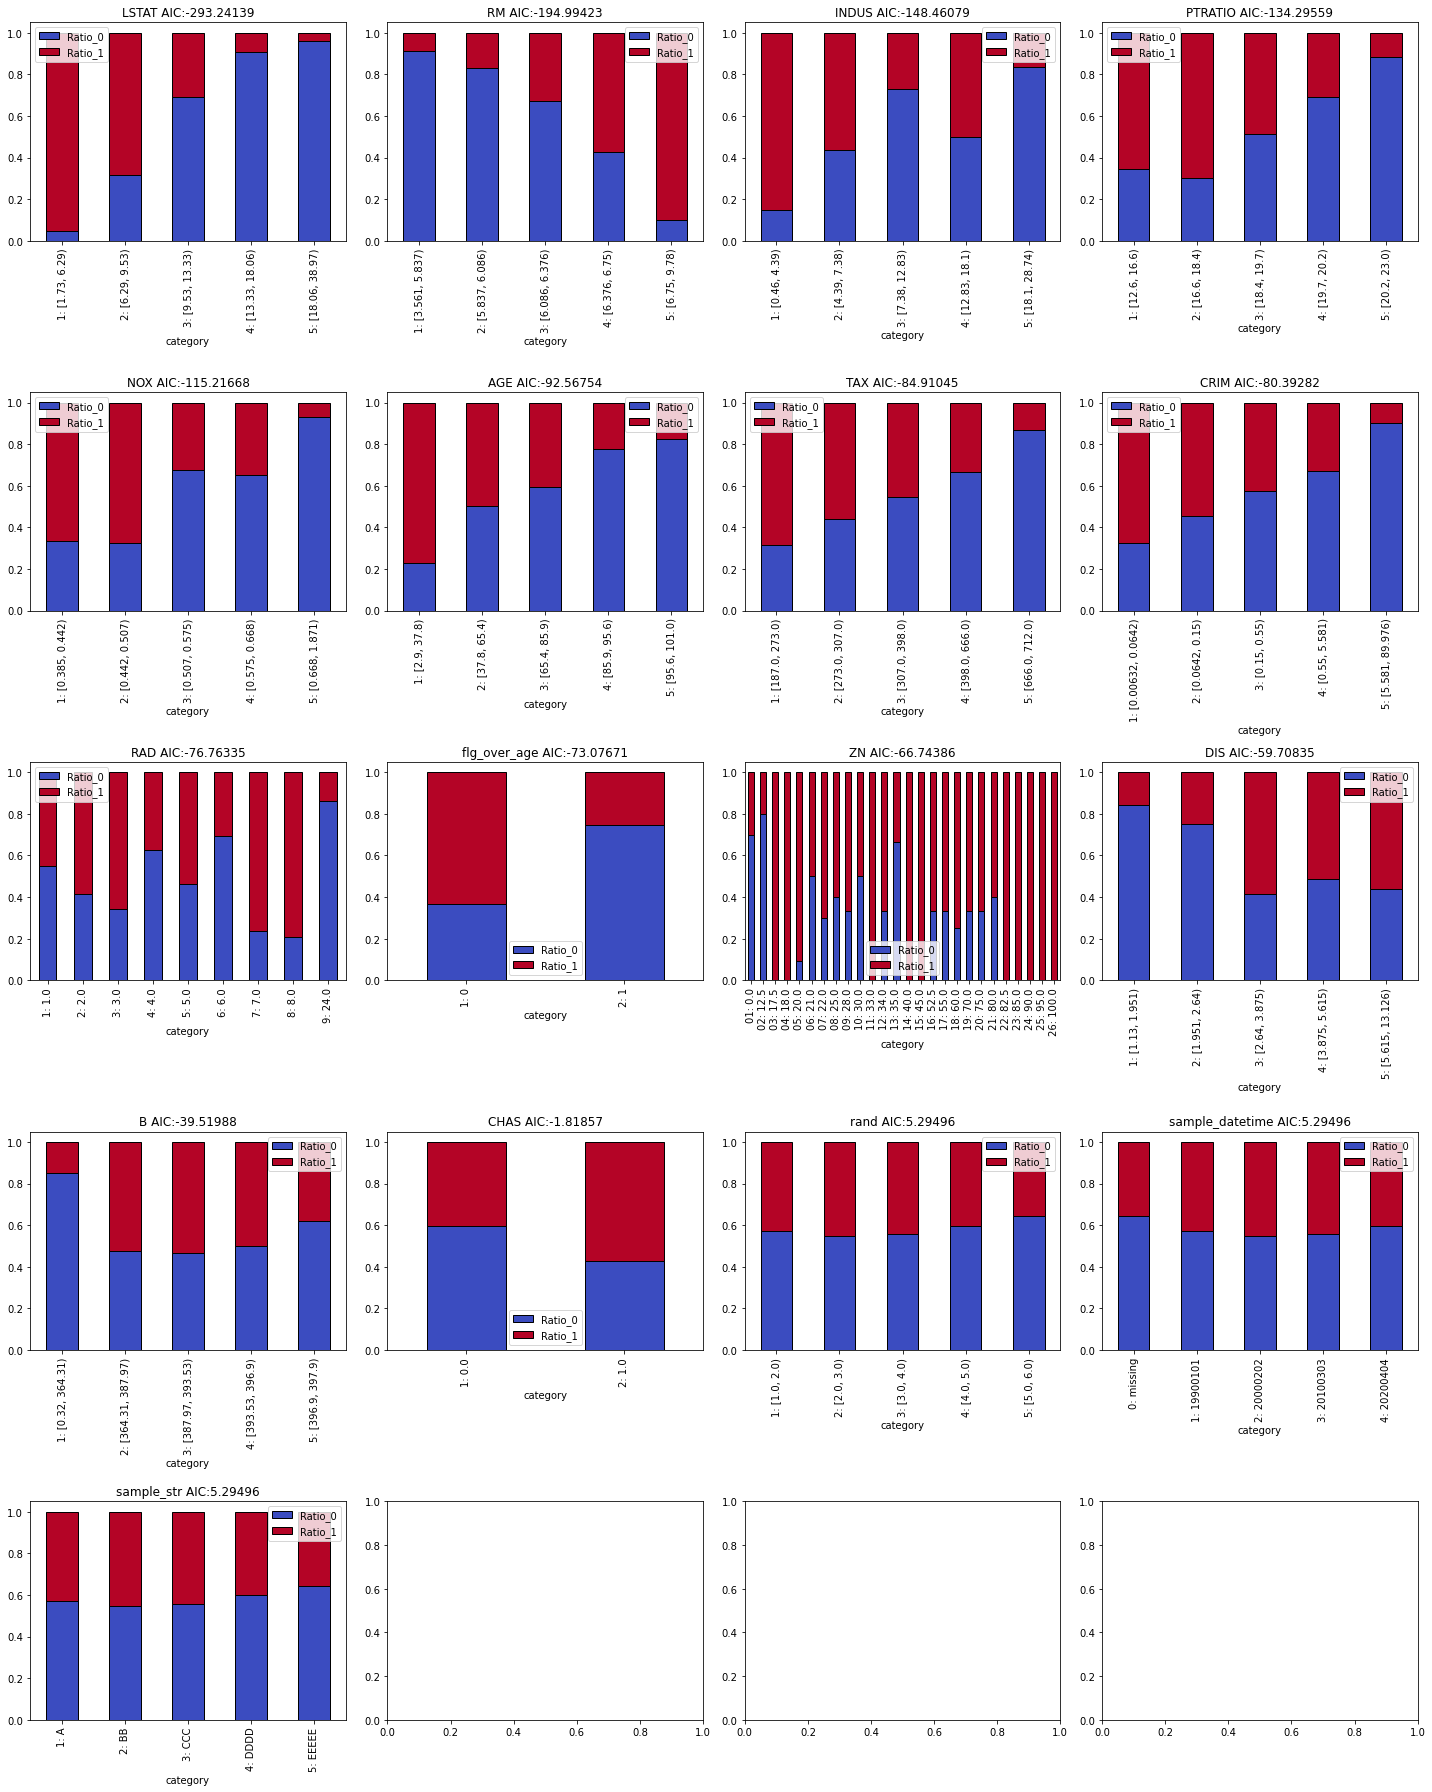

In [16]:
cat.plot()

In [17]:
cat1 = CATDAP01(y_type = "numeric")
cat1.fit(X_df,y)

AIC calculation is end


In [18]:
cat1.to_csv(file_name = "temp2")

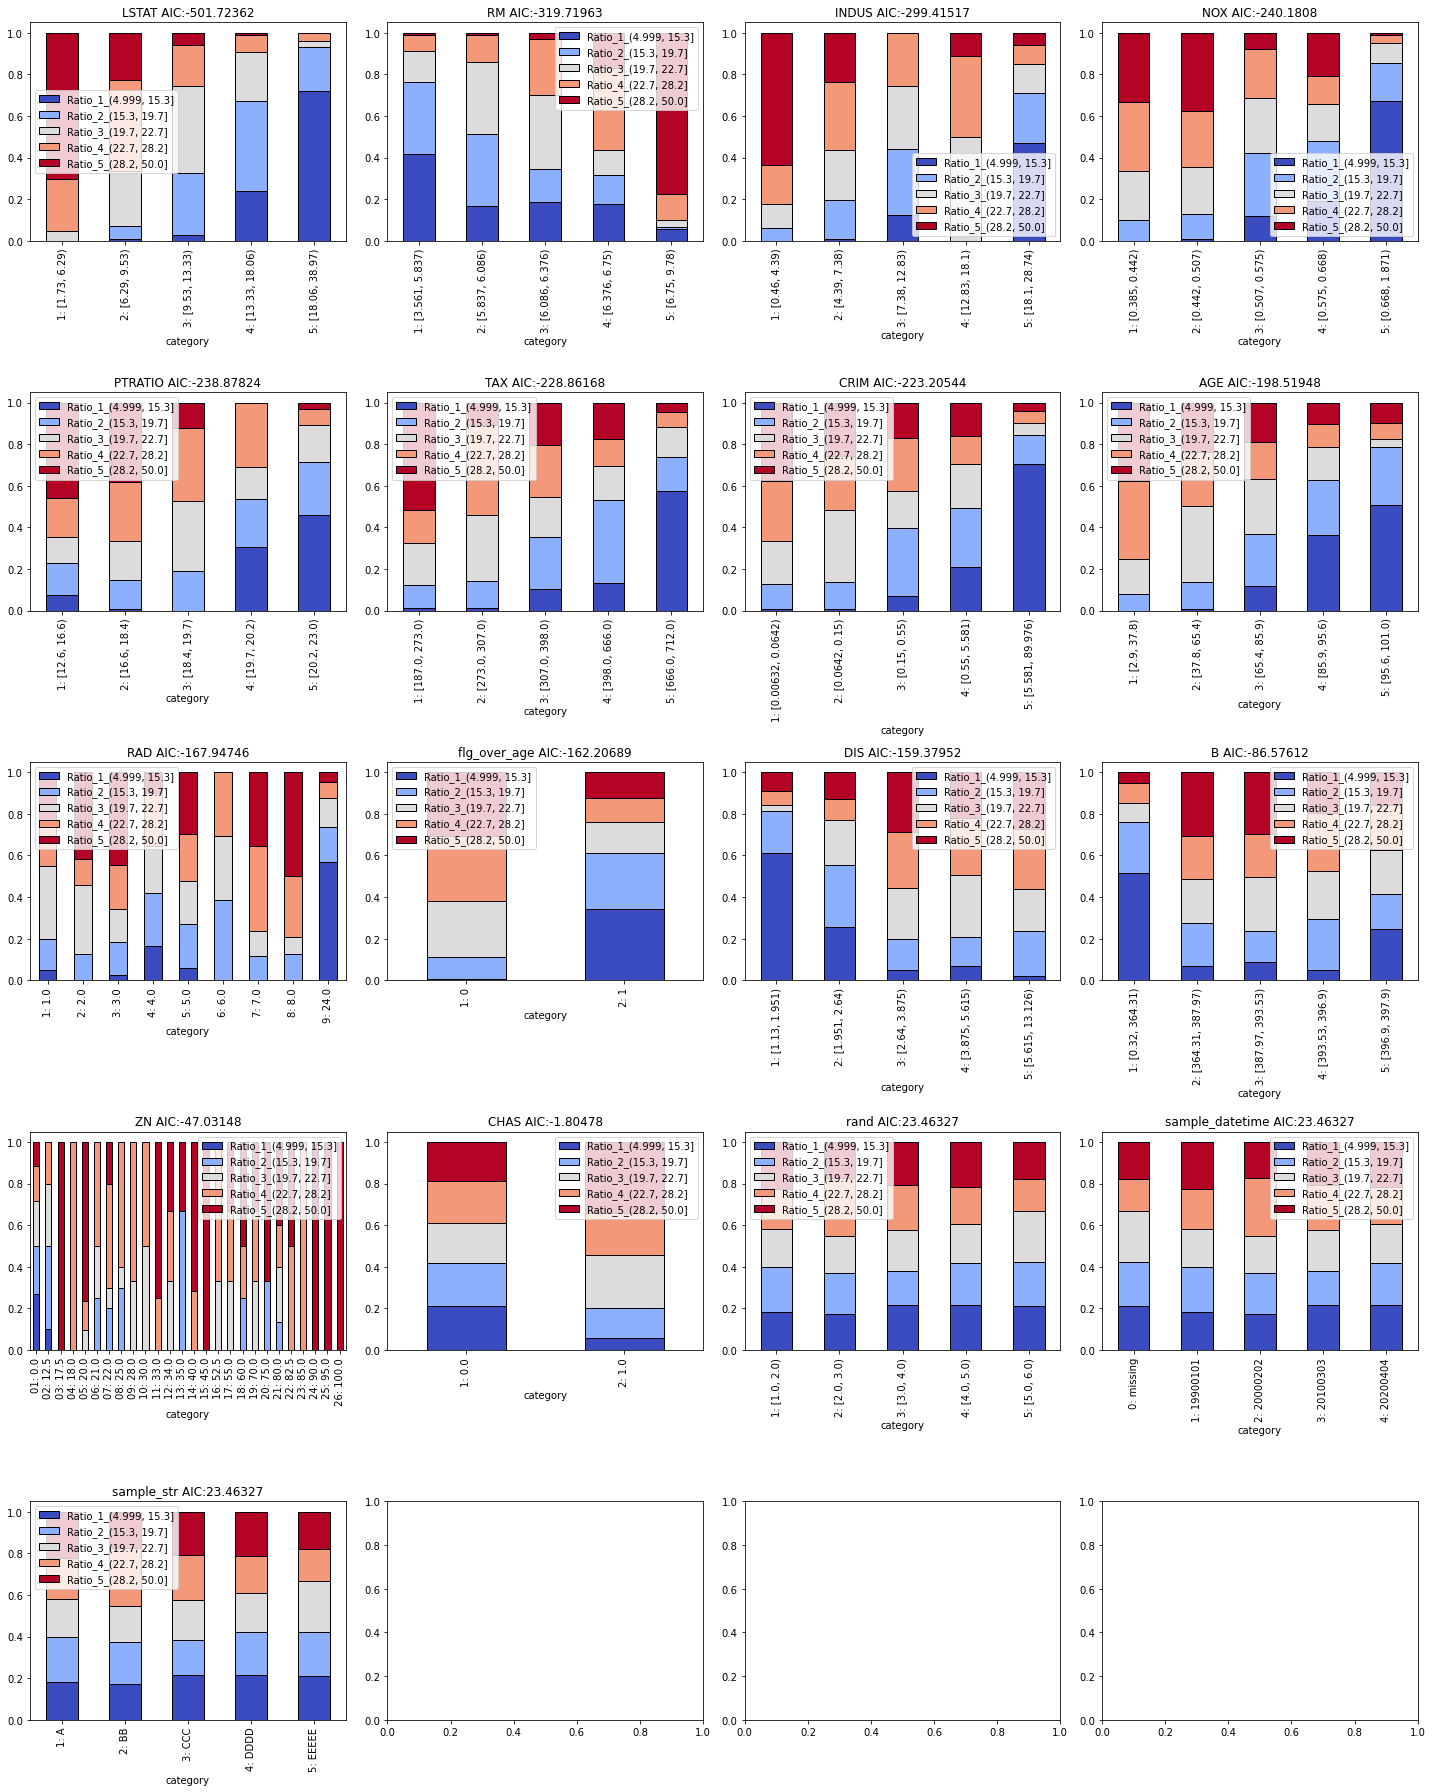

In [19]:
cat1.plot()

In [20]:
mm = pd.DataFrame()
mm["true"] = ["male"]
mm["hope"] = "male"
mm = mm.sample(749,replace = True)

fm = pd.DataFrame()
fm["true"] = ["female"]
fm["hope"] = "male"
fm = fm.sample(445,replace = True)

mf = pd.DataFrame()
mf["true"] = ["male"]
mf["hope"] = "female"
mf = mf.sample(83,replace = True)

ff = pd.DataFrame()
ff["true"] = ["female"]
ff["hope"] = "female"
ff = ff.sample(636,replace = True)

sample_df = pd.concat([mm,fm,mf,ff],axis = 0)

In [22]:
X_samp = sample_df[["true"]]
y_samp = sample_df["hope"]

In [23]:
cat_sample = CATDAP01()
cat_sample.fit(X_samp,y_samp)

AIC calculation is end


In [24]:
cat_sample.AIC_summary
#-526.07768

,feature_name,AIC
0,true,-526.07768


In [25]:
4630.20 - 5156.27 

-526.0700000000006

In [26]:
cat_sample.AIC_table

,feature_name,missing_rate,AIC,category,female,male,All,Ratio_female,Ratio_male
0,true,0.0,-526.07768,1: female,636,445,1081,0.58834,0.41166
1,true,0.0,-526.07768,2: male,83,749,832,0.09976,0.90024
2,true,0.0,-526.07768,All,719,1194,1913,0.37585,0.62415


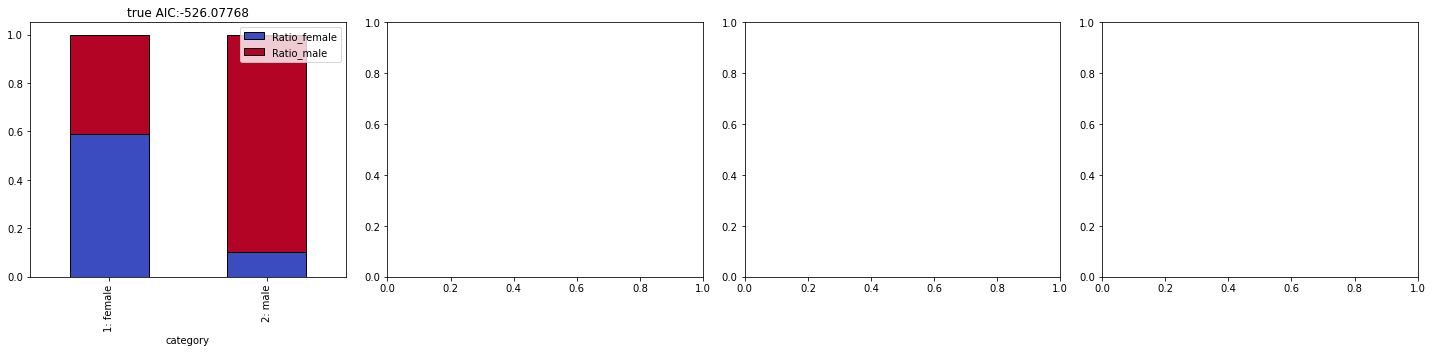

In [27]:
cat_sample.plot()

In [28]:
cat2 = CATDAP02(num_max_select_feature=2)
cat2.fit(X_df,y_binary)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.39s/it]

AIC calculation is end


In [29]:
cat2.AIC_table_all

,feature_name_1,feature_name_2,missing_rate_of_feature_1,missing_rate_of_feature_2,AIC,category_1,category_2,0,1,All,Ratio_0,Ratio_1
0,RM,LSTAT,0.0,0.0,-323.13236,"1: [3.561, 5.837)","1: [1.73, 6.29)",0,1,1.0,0.00000,1.00000
1,RM,LSTAT,0.0,0.0,-323.13236,"1: [3.561, 5.837)","2: [6.29, 9.53)",2,1,3.0,0.66667,0.33333
2,RM,LSTAT,0.0,0.0,-323.13236,"1: [3.561, 5.837)","3: [9.53, 13.33)",17,2,19.0,0.89474,0.10526
3,RM,LSTAT,0.0,0.0,-323.13236,"1: [3.561, 5.837)","4: [13.33, 18.06)",23,4,27.0,0.85185,0.14815
4,RM,LSTAT,0.0,0.0,-323.13236,"1: [3.561, 5.837)","5: [18.06, 38.97)",50,1,51.0,0.98039,0.01961
...,...,...,...,...,...,...,...,...,...,...,...,...
5115,ZN,RAD,0.0,0.0,247.95988,26: 100.0,6: 6.0,0,0,0.0,NaN,NaN
5116,ZN,RAD,0.0,0.0,247.95988,26: 100.0,7: 7.0,0,0,0.0,NaN,NaN
5117,ZN,RAD,0.0,0.0,247.95988,26: 100.0,8: 8.0,0,0,0.0,NaN,NaN
5118,ZN,RAD,0.0,0.0,247.95988,26: 100.0,9: 24.0,0,0,0.0,NaN,NaN


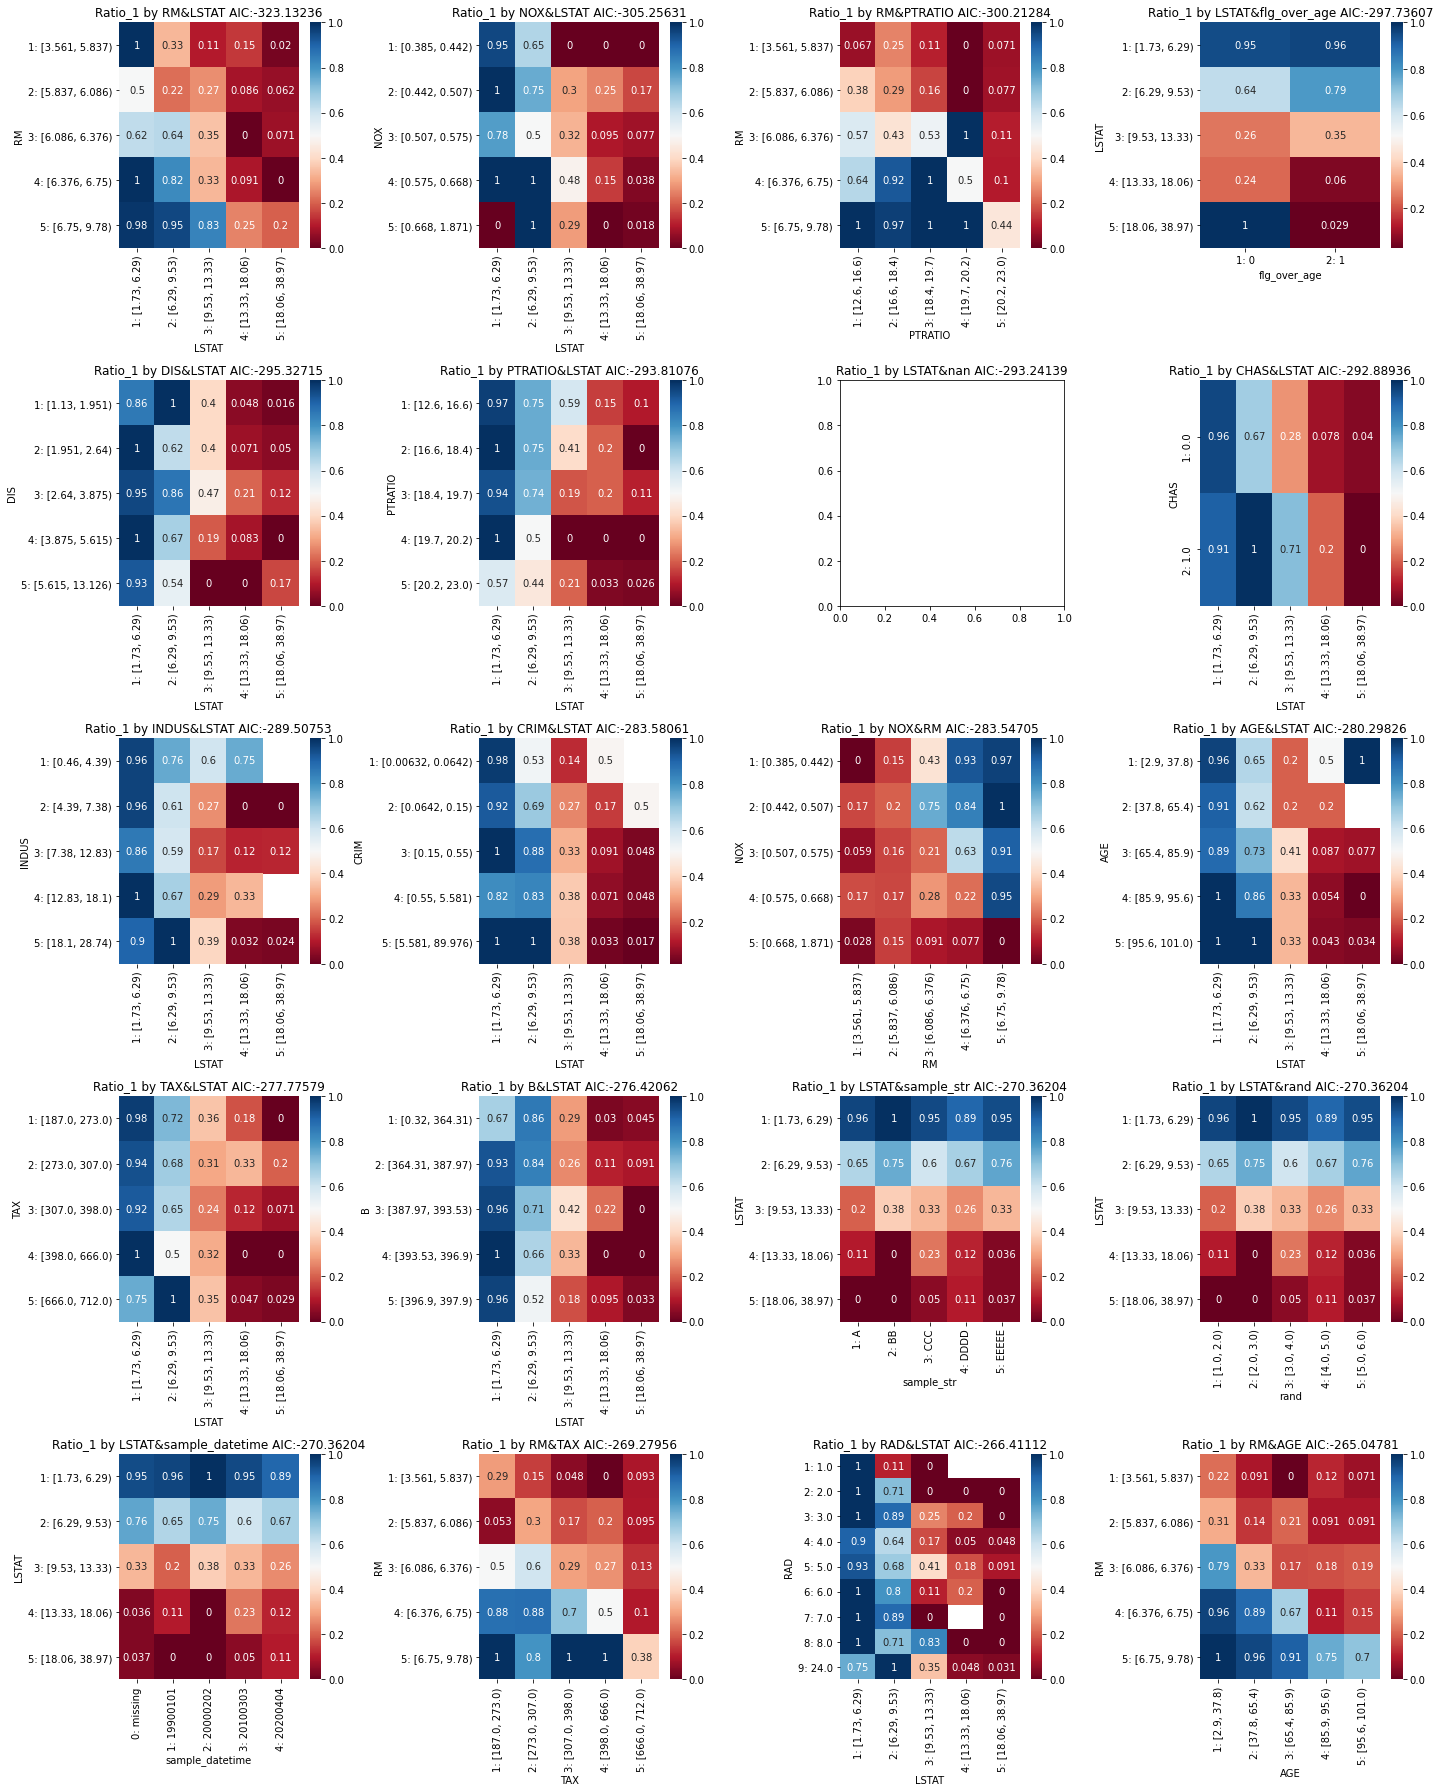

In [30]:
cat2.heatmap("Ratio_1")

In [37]:
#y

In [40]:
cat2_2 = CATDAP02(y_type = "numeric")
cat2_2.fit(X_df,y)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:07<00:00,  3.96s/it]

AIC calculation is end


In [45]:
cat2_2.AIC_summary_all

,feature_name_1,feature_name_2,AIC
0,RM,LSTAT,-541.30675
1,CHAS,LSTAT,-503.08220
2,LSTAT,flg_over_age,-502.54850
3,LSTAT,NaN,-501.72362
4,TAX,LSTAT,-501.31039
...,...,...,...
148,ZN,B,610.65775
149,ZN,sample_datetime,669.92299
150,ZN,sample_str,669.92299
151,ZN,rand,669.92299


In [41]:
cat2_2.AIC_table_all

,feature_name_1,feature_name_2,missing_rate_of_feature_1,missing_rate_of_feature_2,AIC,category_1,category_2,"1_(4.999, 15.3]","2_(15.3, 19.7]","3_(19.7, 22.7]","4_(22.7, 28.2]","5_(28.2, 50.0]",All,"Ratio_1_(4.999, 15.3]","Ratio_2_(15.3, 19.7]","Ratio_3_(19.7, 22.7]","Ratio_4_(22.7, 28.2]","Ratio_5_(28.2, 50.0]"
0,RM,LSTAT,0.0,0.0,-541.30675,"1: [3.561, 5.837)","1: [1.73, 6.29)",0,0,0,0,1,1.0,0.00000,0.00000,0.00000,0.00000,1.0000
1,RM,LSTAT,0.0,0.0,-541.30675,"1: [3.561, 5.837)","2: [6.29, 9.53)",0,1,1,1,0,3.0,0.00000,0.33333,0.33333,0.33333,0.0000
2,RM,LSTAT,0.0,0.0,-541.30675,"1: [3.561, 5.837)","3: [9.53, 13.33)",2,11,4,2,0,19.0,0.10526,0.57895,0.21053,0.10526,0.0000
3,RM,LSTAT,0.0,0.0,-541.30675,"1: [3.561, 5.837)","4: [13.33, 18.06)",4,11,8,4,0,27.0,0.14815,0.40741,0.29630,0.14815,0.0000
4,RM,LSTAT,0.0,0.0,-541.30675,"1: [3.561, 5.837)","5: [18.06, 38.97)",36,12,2,1,0,51.0,0.70588,0.23529,0.03922,0.01961,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,ZN,RAD,0.0,0.0,1364.94569,26: 100.0,6: 6.0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
5116,ZN,RAD,0.0,0.0,1364.94569,26: 100.0,7: 7.0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
5117,ZN,RAD,0.0,0.0,1364.94569,26: 100.0,8: 8.0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
5118,ZN,RAD,0.0,0.0,1364.94569,26: 100.0,9: 24.0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN


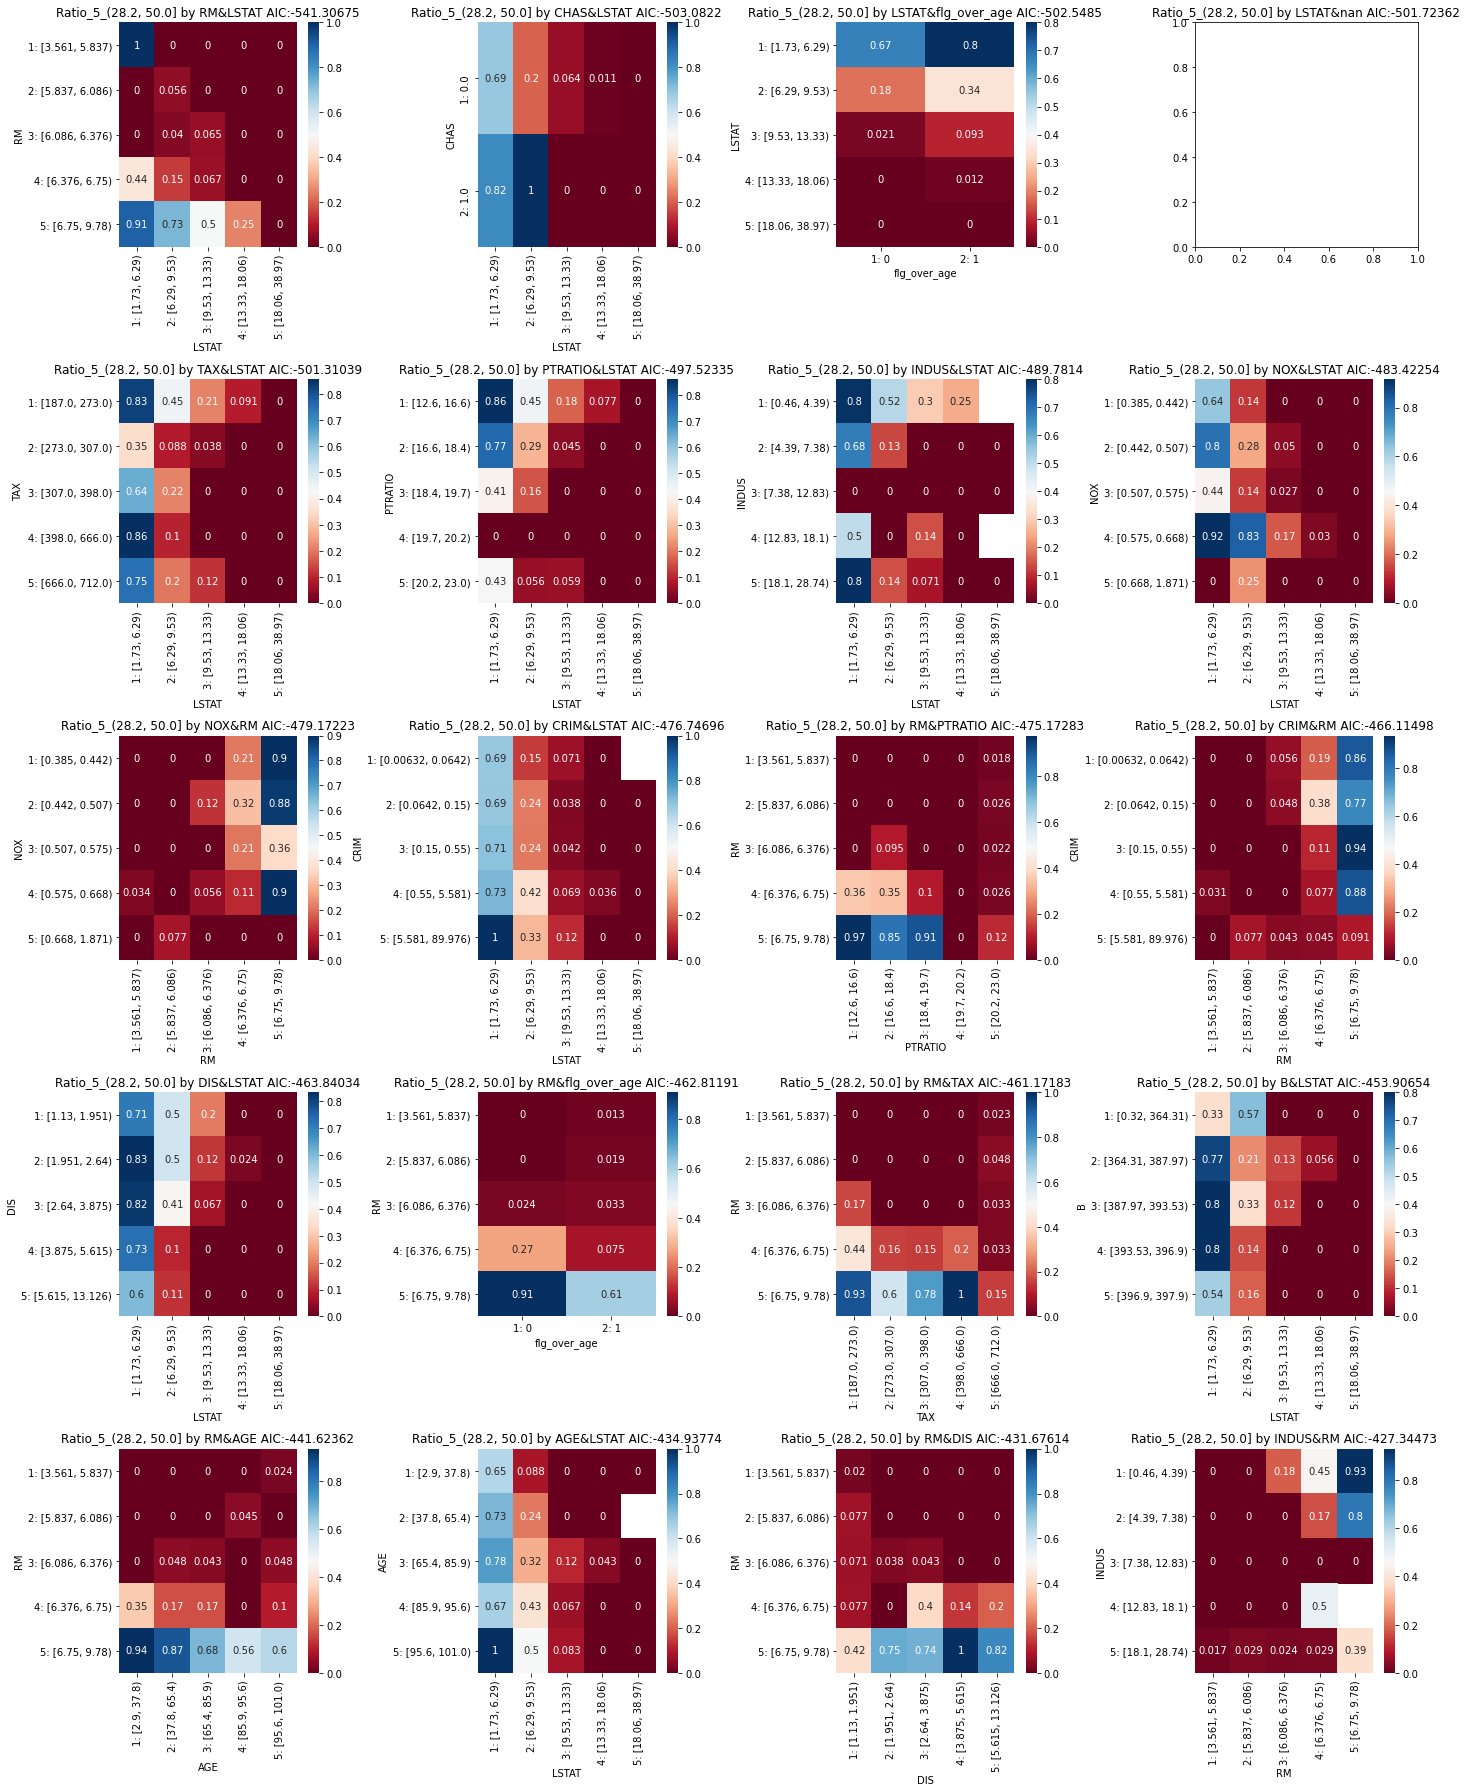

In [42]:
cat2_2.heatmap("Ratio_5_(28.2, 50.0]")

In [31]:
mom = pd.DataFrame()
mom["true"] = ["male"]
mom["age"] = ["over30"]
mom["hope"] = ["male"]
mom = mom.sample(165,replace = True)

mof = pd.DataFrame()
mof["true"] = ["male"]
mof["age"] = ["over30"]
mof["hope"] = ["female"]
mof = mof.sample(22,replace = True)

mum = pd.DataFrame()
mum["true"] = ["male"]
mum["age"] = ["under30"]
mum["hope"] = ["male"]
mum = mum.sample(584,replace = True)

muf = pd.DataFrame()
muf["true"] = ["male"]
muf["age"] = ["under30"]
muf["hope"] = ["female"]
muf = muf.sample(61,replace = True)


fom = pd.DataFrame()
fom["true"] = ["female"]
fom["age"] = ["over30"]
fom["hope"] = ["male"]
fom = fom.sample(113,replace = True)

fof = pd.DataFrame()
fof["true"] = ["female"]
fof["age"] = ["over30"]
fof["hope"] = ["female"]
fof = fof.sample(125,replace = True)

fum = pd.DataFrame()
fum["true"] = ["female"]
fum["age"] = ["under30"]
fum["hope"] = ["male"]
fum = fum.sample(332,replace = True)

fuf = pd.DataFrame()
fuf["true"] = ["female"]
fuf["age"] = ["under30"]
fuf["hope"] = ["female"]
fuf = fuf.sample(511,replace = True)

sample_df = pd.concat([mom,mof,mum,muf,fom,fof,fum,fuf],axis = 0)
sample_df.reset_index(inplace = True,drop = True)

In [32]:
X_sample2 = sample_df.drop("hope",axis = 1)
y_sample2 = sample_df["hope"].copy()

In [33]:
cat2 = CATDAP02()
cat2.fit(X_sample2,y_sample2)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.95it/s]

AIC calculation is end


In [46]:
cat2.AIC_summary_all

,feature_name_1,feature_name_2,AIC
0,true,age,-527.88684
1,true,NaN,-526.07768
2,age,NaN,-0.10883


In [34]:
cat2.AIC_table_all

,feature_name_1,feature_name_2,missing_rate_of_feature_1,missing_rate_of_feature_2,AIC,category_1,category_2,female,male,All,Ratio_female,Ratio_male
0,true,age,0.0,0.0,-527.88684,1: female,1: over30,125,113,238,0.52521,0.47479
1,true,age,0.0,0.0,-527.88684,1: female,2: under30,511,332,843,0.60617,0.39383
2,true,age,0.0,0.0,-527.88684,2: male,1: over30,22,165,187,0.11765,0.88235
3,true,age,0.0,0.0,-527.88684,2: male,2: under30,61,584,645,0.09457,0.90543
4,true,age,0.0,0.0,-527.88684,All,,719,1194,1913,0.37585,0.62415
5,true,NaN,0.0,NaN,-526.07768,1: female,NaN,636,445,1081,0.58834,0.41166
6,true,NaN,0.0,NaN,-526.07768,2: male,NaN,83,749,832,0.09976,0.90024
7,true,NaN,0.0,NaN,-526.07768,All,NaN,719,1194,1913,0.37585,0.62415
8,age,NaN,0.0,NaN,-0.10883,1: over30,NaN,147,278,425,0.34588,0.65412
9,age,NaN,0.0,NaN,-0.10883,2: under30,NaN,572,916,1488,0.38441,0.61559


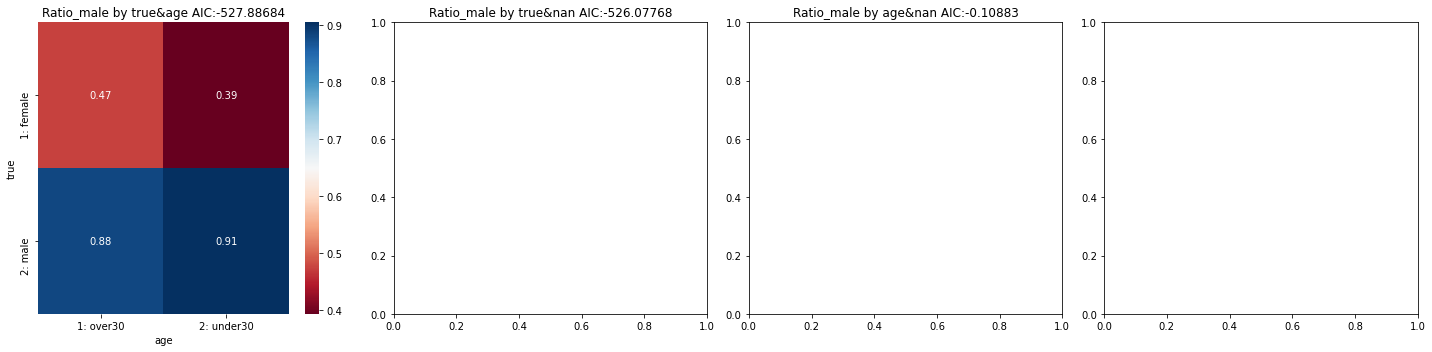

In [35]:
cat2.heatmap("Ratio_male")